In [1]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
conn = sqlite3.connect('rumah_sakit.db')

In [3]:
c = conn.cursor()

In [4]:
data = pd.read_excel("rumah_sakit.xlsx")
data

,kode,penyakit,nama,alamat,obat,Terkena penyakit,tahun masuk
0,345099,Flu,Dika,Lamongan,Rp. 20.000,10,2020
1,345100,Demam,Dina,lamongan,Rp. 20.000,7,2020
2,345101,Diabetes,Diki,Lamongan,Rp. 20.000,1,2020
3,345102,Cacar Air,Dodit,lamongan,Rp. 20.000,3,2020
4,345103,Asam urat,Jujun,Lamongan,Rp. 20.000,5,2020
5,345104,Batu Ginjal,yanto,lamongan,Rp. 25.000,1,2020
6,345105,Campak,Kiki,Lamongan,Rp. 25.000,3,2020
7,345106,Encok,Agung,lamongan,Rp. 25.000,1,2020
8,345107,Gagal ginjal,Sofian,Lamongan,Rp. 25.000,2,2020
9,345108,Hepatitis,Sinin,Sidoarjo,Rp. 30.000,4,2020


In [5]:
c.executescript('drop table if exists kota')
c.executescript('drop table if exists pasien')
c.executescript('drop table if exists obat')
c.executescript('drop table if exists data_transaksi')
c.execute("CREATE TABLE IF NOT EXISTS 'kota' ('id_kota' INT, 'asal_kota' VARCHAR(255) NULL, PRIMARY KEY ('id_kota'))")
c.execute("CREATE TABLE IF NOT EXISTS 'pasien' ('id_pasien' INT, 'nama_pasien' VARCHAR(255) NULL, 'kota_id' INT NOT NULL, PRIMARY KEY ('id_pasien'), FOREIGN KEY ('kota_id') REFERENCES 'kota' ('id_kota') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'obat' ( 'id_obat' INT, 'penyakit' VARCHAR(255) NULL, 'obat' FLOAT NULL, PRIMARY KEY ('id_obat'))")
c.execute("CREATE TABLE IF NOT EXISTS 'data_transaksi' ( 'id_transaksi', 'tahun_masuk' DATE NULL, 'lama_rawat' INT NULL, 'pasien_id' INT NOT NULL,'obat_id' INT NOT NULL, PRIMARY KEY ('id_transaksi'), FOREIGN KEY ('pasien_id') REFERENCES 'pasien' ('id_pasien') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('obat_id') REFERENCES 'obat' ('id_obat') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [6]:
kota = []
obat = []

for i,j in data.iterrows():
    if j[3] not in kota:
        kota.append(j[3])
        
    k = -1
    for index, value in enumerate(kota):
        if value == j[3]:
            k = index+1
            break

    if isinstance(j[1], str):
        if [j[1],j[4].replace("Rp", "").replace(",", "")[0:-3]] not in obat:
            obat.append([j[1],j[4].replace("Rp", "").replace(",", "")[0:-3]])


In [7]:
c.execute("DELETE FROM KOTA")
for index, i in enumerate(kota): 
    c.execute("INSERT INTO KOTA VALUES(" + str(index+1) + ", '" + str(i) + "')")
    
c.execute("DELETE FROM OBAT")
for index, i in enumerate(obat): 
    c.execute("INSERT INTO OBAT VALUES(" + str(index+1) + ", '" + str(i[0]) + "','"+str(i[1])+"')")
    
conn.commit()

In [8]:
c.execute('''SELECT * FROM KOTA''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================KOTA================================")
print(KOTA)
print("============================================================")

c.execute('''SELECT * FROM OBAT''')
OBAT = []
for row in c.fetchall():
    OBAT.append(row)
print("========================PRODUK================================")
print(OBAT)
print("============================================================")

========================KOTA================================
[(1, 'Lamongan'), (2, 'lamongan'), (3, 'Sidoarjo'), (4, 'Magetan'), (5, 'Tuban'), (6, 'Jakarta'), (7, 'Malang'), (8, 'Madura'), (9, 'Mojokerto')]
========================PRODUK================================
[(1, 'Flu', '. 20.'), (2, 'Demam', '. 20.'), (3, 'Diabetes', '. 20.'), (4, 'Cacar Air', '. 20.'), (5, 'Asam urat', '. 20.'), (6, 'Batu Ginjal', '. 25.'), (7, 'Campak', '. 25.'), (8, 'Encok', '. 25.'), (9, 'Gagal ginjal', '. 25.'), (10, 'Hepatitis', '. 30.'), (11, 'Hernia', '. 30.'), (12, 'Herpes', '. 30.'), (13, 'Jamur kuku', '. 30.'), (14, 'Kutil', '. 30.'), (15, 'Malaria', '. 30.'), (16, 'Migrain', '. 30.'), (17, 'Panu', '. 30.'), (18, 'Pikun', '. 30.'), (19, 'Rabun Dekat', '. 30.'), (20, 'Cacar Air', '. 30.'), (21, 'Chikungunya', '. 50.'), (22, 'Rabun jauh', '. 50.'), (23, 'Sariawan', '. 50.'), (24, 'Tumor', '. 50.'), (25, 'Gagal jantung', '. 50.'), (26, 'Hipertensi', '. 50.'), (27, 'Kanker darah', '. 50.'), (28, 'Kut

In [9]:
#menghitung jumlah penyakit paling banyak diderita
penyakit_paling_banyak_diderita = data[['penyakit', 'Terkena penyakit']].groupby(['penyakit']).sum().sort_values(by='Terkena penyakit',ascending=False).reset_index()
penyakit_paling_banyak_diderita.head()

,penyakit,Terkena penyakit
0,Pilek,17
1,Sariawan,15
2,Alergi,14
3,Diare,12
4,Panu,11


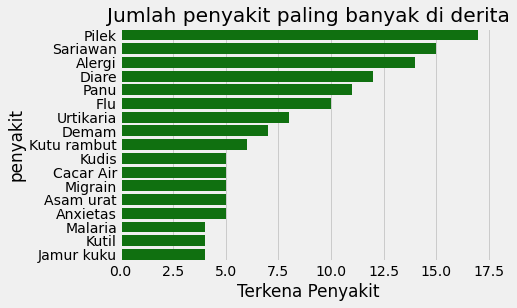

In [10]:
# jumlah penyakit paling banyak di derita oleh pasien
sns.barplot(x='Terkena penyakit',y='penyakit',data=penyakit_paling_banyak_diderita[:17],color="green")
plt.xlabel("Terkena Penyakit")
plt.ylabel("penyakit")
plt.title("Jumlah penyakit paling banyak di derita")
plt.xticks(rotation='horizontal')
plt.show()

In [11]:
data['alamat'].value_counts()

Madura       12
Jakarta      11
Lamongan      5
Malang        5
Tuban         4
lamongan      4
Magetan       3
Mojokerto     3
Sidoarjo      1
Name: alamat, dtype: int64

In [12]:
data['penyakit'].value_counts()

Cacar Air             2
Tumor                 1
Jamur kuku            1
Rabun Dekat           1
Kutu rambut           1
Urtikaria             1
E-coli                1
Pikun                 1
Kutil                 1
Dehidrasi             1
Hepatitis             1
Migrain               1
Anxietas              1
Typus                 1
Gagal ginjal          1
Kanker darah          1
Diare                 1
Gagal jantung         1
Rabun jauh            1
Hernia                1
Bronkitis             1
Buta warna            1
Bintitan              1
Flu                   1
Batu Ginjal           1
Radang tenggorokan    1
Malaria               1
Sariawan              1
Pilek                 1
Asam urat             1
Kudis                 1
Diabetes              1
Fobia                 1
Hipertensi            1
Varises               1
Campak                1
Katarak               1
Chikungunya           1
Panu                  1
Demam                 1
Flu burung            1
Hipersomnia     

In [13]:
#menghitung jumlah pasien dari kota asalnya
pasien_dari_kota = data[['alamat', 'nama']].groupby(['alamat']).count().sort_values(by='nama',ascending=False).reset_index()
pasien_dari_kota.head()

,alamat,nama
0,Madura,12
1,Jakarta,11
2,Lamongan,5
3,Malang,5
4,Tuban,4


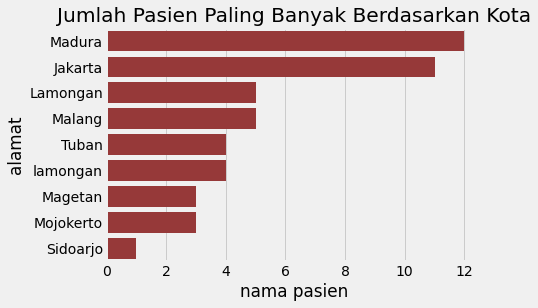

In [14]:
# menghitung pasien dari kota asalnya 
sns.barplot(x='nama',y='alamat',data=pasien_dari_kota[:9],color="brown")
plt.xlabel("nama pasien")
plt.ylabel("alamat")
plt.title("Jumlah Pasien Paling Banyak Berdasarkan Kota")
plt.xticks(rotation='horizontal')
plt.show()

In [15]:
# menghitung jumlah obat paling mahal sesuai penyakit
Harga_obat = data[['obat', 'penyakit']].groupby(['obat']).count().sort_values(by='penyakit',ascending=False).reset_index()
Harga_obat.head()

,obat,penyakit
0,Rp. 50.000,28
1,Rp. 30.000,11
2,Rp. 20.000,5
3,Rp. 25.000,4


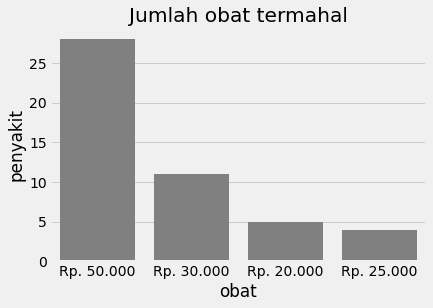

In [16]:
# obat paling mahal 
sns.barplot(x='obat',y='penyakit',data=Harga_obat[:4],color="grey")
plt.xlabel("obat")
plt.ylabel("penyakit")
plt.title("Jumlah obat termahal")
plt.xticks(rotation='horizontal')
plt.show()